# Data Wrangling

Before diving into the practical aspects of data wrangling, let's first understand the real meaning of the term "wrangle." In everyday language, it means to take care of or deal with someone or something, usually when it is challenging. Now, let's apply this concept to the world of data.

In the data world, "wrangling" is the process of dealing with difficult or messy data. This typically involves cleaning up raw, erroneous, or incomplete data, which can often consume 90% of a data scientist's or data analyst's time. The goal is to transform that messy data into a nice, structured, and easy-to-use format. This is the essence of data wrangling.

At this point, you might assume that data wrangling is simply another term for data cleaning, data remediation, or data munging. While there is overlap, data wrangling encompasses a broader set of processes.

These processes are designed to transform raw data into a format that is more readily usable for analysis. The specific steps involved can differ from project to project, depending on the nature of the data and the goals we are trying to achieve.


Some of the example include:

* Merging mulitple data sources into a single dataset for analysis
* Identifying gaps in data and either filling or deleting them
* Unncessary data removal which are irrelevant to the project
* Understanding of outliers(analysing the importance of outliers)

Note: Though data cleaning and data wrangling used interchangeably, there is distinction.

* Data wrangling is the overal process of transformation raw data into a more usable form.

* Data cleaning is a critical step in the data wrangling process to remove inaccurate and inconsistent data.

[Source](https://online.hbs.edu/blog/post/data-wrangling)

# Example: Used Cars Pricing

For this process I have used "Automobile Dataset" from the link:  https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data


# Objectives

* Handling missing values
* Correct data formatting
* Standardize and normalize data

In [119]:
import pandas as pd
import matplotlib.pyplot as plt

### Reading dataset from the URL

In [120]:
url =  'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
df = pd.read_csv(url)
df

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


As there is no header in this dataset, so let's add the header columns.

In [121]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [122]:
df.columns = headers
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


We can clearly see the above there is '?'; Those may obviously may not reflect the essence in the data, which is gonna hinder furhter analysis.

__How to work with missing data?__

a. Identify missing data

b. Deal with missing data

c. Correct data format

# Identify and handle missing values

As above '?' has already identified pretty easily, so let's replace that with null values

In [123]:
# library
import numpy as np

# replace "?" to NaN

df.replace('?', np.nan, inplace = True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


### Evaluating for missing Data

There are two ways to find out the missing data.

a. isnull()

b. notnull()

In [124]:
df.isnull().head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [125]:
df.notnull().head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,True,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


The output is a boolean value indicating whether the value that is passed into the argument:

* is missing data in case of __isnull()__

* not missing data in case of __notnull()__


Let's visulise above boolean expression into another format using __sum()__ method, which returns the summation of total available missing values.

In [126]:
df.isnull().sum()

symboling             0
normalized-losses    40
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

We can also view above in anther way by using __value_counts()__ method.

In [127]:
# let's set above missing values in the new variable 'missing_data'

missing_data = df.isnull()

In [128]:
#for column in missing_data.columns.values.tolist():
#  print(column)
#  print("Missing data in", missing_data[column].value_counts())
#  print('')

### Deal with missing data:

1. Drop data:

  - Drop the whole row
  - Drop the whole column
2. Replace data

  - Replace with mean value
  - Replace by frequency
  - replace it based on other functions

Notes:

We should only drop the whole columns if most entries in the column are empty. In the data set, none of the columns are empty enough to drop entirely.

__Replace by mean:__

* "normalized-losses": 41 missind data, replace them with mean
* "stroke": 4 missing data, replace with mean
* "bore": 4 missind data, replace with mean
* "horsepower": 2 missing data, replace with mean
* "peak-rpm": 2 missing data, replace with mean


__Replace by Frequecny:__

* "num-of-doors": 2 missing data, replace with Frequency

__Drop the whole row:__

* "price": 4 missing data, simple delete the whole row

  - reason: For the prediction to price, we cannot use any data entry without price data, so better to remove them for now.




### Calculate the mean value for the 'normalized-losses' column

Before doing this, first we check the datatypes with __info() method. __

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          204 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               204 non-null    object 
 3   fuel-type          204 non-null    object 
 4   aspiration         204 non-null    object 
 5   num-of-doors       202 non-null    object 
 6   body-style         204 non-null    object 
 7   drive-wheels       204 non-null    object 
 8   engine-location    204 non-null    object 
 9   wheel-base         204 non-null    float64
 10  length             204 non-null    float64
 11  width              204 non-null    float64
 12  height             204 non-null    float64
 13  curb-weight        204 non-null    int64  
 14  engine-type        204 non-null    object 
 15  num-of-cylinders   204 non-null    object 
 16  engine-size        204 non

To calculate the mean value, string columns has to be converted into numeric type, which could be int or float depending upon the attributes.

For this we are coverting into float.

In [130]:
avg_norm_loss = df['normalized-losses'].astype('float').mean()
avg_norm_loss

np.float64(122.0)

### Replace "NaN with mean value

In [131]:
# replace on Normalised losses
df['normalized-losses'].replace(np.nan,avg_norm_loss, inplace = True)

/tmp/ipykernel_86135/2315536787.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['normalized-losses'].replace(np.nan,avg_norm_loss, inplace = True)


In [132]:
# replace on bore column
avg_bore = df['bore'].astype('float').mean()

df['bore'].replace(np.nan, avg_bore, inplace = True)

/tmp/ipykernel_86135/1628693308.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bore'].replace(np.nan, avg_bore, inplace = True)


In [133]:
# replace on stroke column

avg_stroke = df['stroke'].astype('f').mean()

df['stroke'].replace(np.nan, avg_stroke, inplace = True)

/tmp/ipykernel_86135/1283013606.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['stroke'].replace(np.nan, avg_stroke, inplace = True)


In [134]:
#replace on horsepower

avg_horsepower = df['horsepower'].astype('f').mean()

df['horsepower'].replace(np.nan, avg_horsepower, inplace = True)

/tmp/ipykernel_86135/4241516796.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['horsepower'].replace(np.nan, avg_horsepower, inplace = True)


In [135]:
# replace on peakrpm
avg_peakrpm = df['peak-rpm'].astype('f').mean()
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace = True)


/tmp/ipykernel_86135/1251100870.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace = True)


In [136]:
df['peak-rpm'].value_counts()

peak-rpm
5500           37
4800           36
5000           26
5200           23
5400           13
6000            9
4500            7
5800            7
5250            7
4200            5
4150            5
4750            4
4350            4
4250            3
5100            3
5900            3
4400            3
5125.990234     2
6600            2
4650            1
5600            1
5750            1
4900            1
5300            1
Name: count, dtype: int64

### Replace missing values by the most Frequent


How would we know now, by which number should we replace the nan values in case of categorical variables? 

* Check which categorical attributes has higher frequency values with two method: 

- __value_counts()__ : value_counts() method is used to see which values are present in a column. 
- __idxmax()__ : use to see the most common type or frequent one automatically without need to see any other values. Just quikly check which has got the higest count or common one. 
    * To use idxmax, add this "idxmax" method to the end of the 'value_counts()"

In [137]:
df['num-of-doors'].value_counts()

num-of-doors
four    114
two      88
Name: count, dtype: int64

* Four doors are the most common type. 

In [138]:
df['num-of-doors'].value_counts().idxmax()

'four'

In [139]:
# Replace with 'four'

df['num-of-doors'].replace(np.nan, 'four', inplace = True)

/tmp/ipykernel_86135/240237582.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['num-of-doors'].replace(np.nan, 'four', inplace = True)


### Drop the rows entirely

In [140]:
# Drop whole row having NaN in Price column
df.dropna(subset=['price'], axis = 0, inplace= True)

__Note: We have to reset the index when rows are dropped (as in the previous step), the original row indices are retained. This method gives the DataFrame a new, sequential index starting from 0. There's gonna be old index as it is, with this argument, (drop = True) ensures that the old index (before resetting) is dropped.__

In [141]:
df.reset_index(drop= True, inplace= True)

In [142]:
#let's explore our data
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
196,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
197,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
198,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


Four rows has been deleted (200 rows) from the orignal data(204 rows)

In [143]:
# once again check the missing values
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

Our data looks with free of any missing values. 

### Correct data format

This is also the another part of data cleaning process, which is also called __data Wrangling__ and it ensures taht all data is in the correct format( int, float, text......)

* To check the data type, use __dtype()__ method. 
* To change the datatype, use __astype()__ method as done previously above. 

Don't be confused that previously we have not made changes in the original dataset's datatypes. We just created a new variable and perform operation and store the value in new variable of 'float' type. 

In [144]:
# checkout the datatypes

df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In short: 

* Numerical variables should be 'float' or 'int' type. 

* Categorical variables should be of 'object' type. 

'bore', 'stroke' are of object type, which should be converted to proper format either 'int' or 'float' as per the requirements. 

### Convert data types to proper format

And this time let's make it changes in the original datasets. 

In [145]:
# change into float type
df[['bore','stroke']]=df[['bore','stroke']].astype('f')
df[['price','peak-rpm']] = df[['price','peak-rpm']].astype('float')

In [146]:
# Check to int type

df[['normalized-losses']] = df[['normalized-losses']].astype('int')

In [147]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float32
stroke               float32
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

We can check the individual columns also using the same astype() method. 

In [148]:
df['bore'].dtype

dtype('float32')

Oooohhh! That's a great deal of dealing with data. 
Cheerup. Now our data is cleaned perfectly. 


### Data Standardization

It is a process of transforming data into a common format. Often data has different unit or scales. 

For example:
a. Suppose in the dataset, there is one column "price" which is measured in "dollars" and another in "meters", the features with larger values might disproprotionately affect the model unless both are standardised. 

Data standardization is a preprocessing step, where the features(data) are transfomred to have __zero mean__ and __unit variance(1)__, which ensures that all features contribute equally to the model's training process. 

Why? 

various reasons: 

a. When features are on different scales, machine learning algorithms may place more importance on features with larger scales. Standardization ensures that each feature contributes equally

b. Improves Model Performance: Many algorithms like logistic regression, support vector machines (SVMs), and k-nearest neighbors (KNN) perform better when features are standardized.

c. Gradient-based methods: Models like linear regression, neural networks, and gradient descent also benefit from standardized data since it ensures faster and more stable convergence.

In [149]:
import pandas as pd
example = pd.DataFrame({
    'Name' : ['Suresh', 'Mahesh', 'Ramesh', 'Sailesh'],
    'Height(cm)' : [170, 160, 180, 150],
    'Weight(kg)' : [65, 70, 80, 55]

})
example

,Name,Height(cm),Weight(kg)
0,Suresh,170,65
1,Mahesh,160,70
2,Ramesh,180,80
3,Sailesh,150,55


The features are on diffeent scales(height in cm and weight in kg), and has large values discripancies. 

The formula for standardization is: 

$$ z = (x - \mu )/ \sigma $$

Where, 
* x is the orignal feature value
* $\mu$ is the mean of the feature
* $\sigma$ is the standard deviation of the feature

In [150]:
# For now we are doing all by step by step, later we are gonna use function directly. 

# calculate the mean of the Height and weight

height_mean = example['Height(cm)'].mean()
weight_mean = example['Weight(kg)'].mean()
print(height_mean)
print(weight_mean)

165.0
67.5


In [151]:
# calculate the standard deviation of Height and Weight

height_std = example['Height(cm)'].std()
weigth_std = example['Weight(kg)'].std()


In [152]:
# calculate z value for height

example['Height(cm)'] = (example['Height(cm)'] - height_mean)/ height_std
example['Height(cm)']

0    0.387298
1   -0.387298
2    1.161895
3   -1.161895
Name: Height(cm), dtype: float64

In [153]:
# calcualte z value for weight

example['Weight(kg)'] = (example['Weight(kg)'] - weight_mean)/ weigth_std
example['Weight(kg)']

0   -0.240192
1    0.240192
2    1.200961
3   -1.200961
Name: Weight(kg), dtype: float64

In [154]:
example

,Name,Height(cm),Weight(kg)
0,Suresh,0.387298,-0.240192
1,Mahesh,-0.387298,0.240192
2,Ramesh,1.161895,1.200961
3,Sailesh,-1.161895,-1.200961


### StandardScaler

We have library calleld StandardScaler which can easily make our data standaridized. 

In [155]:
from sklearn.preprocessing import StandardScaler

import pandas as pd
example = pd.DataFrame({
    'Name' : ['Suresh', 'Mahesh', 'Ramesh', 'Sailesh'],
    'Height(cm)' : [170, 160, 180, 150],
    'Weight(kg)' : [65, 70, 80, 55]

})
example

# Initilizse the StandardScaler

scaler = StandardScaler()

# Standardise the data
new_df = example[['Height(cm)', 'Weight(kg)']]
new_df[['height_std', 'weight_std']] = scaler.fit_transform(new_df)
new_df

,Height(cm),Weight(kg),height_std,weight_std
0,170,65,0.447214,-0.27735
1,160,70,-0.447214,0.27735
2,180,80,1.341641,1.38675
3,150,55,-1.341641,-1.38675


### Moving to our previous main example

In the our dataset, there is fuel consumptions columns "city-mpg" and "highway-mpg" represented by mpg(miles per gallon)
unit. But these need to be transformed to "L/100km".

Formula for unit conversion: 

L/100km = 235/ mpg

In [156]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
1,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0
4,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500.0,19,25,15250.0


In [157]:
df['city-L/100km'] = 255/df["city-mpg"]
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,12.142857
1,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,13.421053
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,10.625000
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,14.166667
4,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,8.5,110,5500.0,19,25,15250.0,13.421053


In [158]:
# transform mpg to L/100km in the column "highway-mpg"

df['highway-L/100km'] = 255 / df['highway-mpg']
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,16500.0,12.142857,9.444444
1,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000.0,19,26,16500.0,13.421053,9.807692
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500.0,24,30,13950.0,10.625000,8.500000
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500.0,18,22,17450.0,14.166667,11.590909
4,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,3.19,3.40,8.5,110,5500.0,19,25,15250.0,13.421053,10.200000


As there is both old and new attributes present in the dataset. 

So, we should do as below to reflect in the original dataset. 

In [159]:
# transform the data
df['highway-mpg'] = 235 / df['highway-mpg']

df.rename(columns= {'highway-mpg': 'highway-L/100km'}, inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,highway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,12.142857,9.444444
1,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,13.421053,9.807692
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,10.625000,8.500000
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0,14.166667,11.590909
4,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,3.19,3.40,8.5,110,5500.0,19,9.400000,15250.0,13.421053,10.200000


In [160]:
# transform for city-mpg also

df['city-mpg'] = 235/ df['city-mpg']

#rename
df.rename(columns= {'city-mpg':'city-L/100km'}, inplace= True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,city-L/100km,highway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,11.190476,8.703704,16500.0,12.142857,9.444444
1,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000.0,12.368421,9.038462,16500.0,13.421053,9.807692
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500.0,9.791667,7.833333,13950.0,10.625000,8.500000
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500.0,13.055556,10.681818,17450.0,14.166667,11.590909
4,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,3.19,3.40,8.5,110,5500.0,12.368421,9.400000,15250.0,13.421053,10.200000


## Data Normalization

It is a process of transforming values of several variables into a similar range or rescaling numerical data to a common scale, typically within the range of 0 to 1. 

Goal: 

* To ensure that all features have the same scale

When to use:

* when data doesnot follow a normal distribution

* Need the features to be on the same scale for distance based algorithms (KNN or clustering)

The formula for Normalization is and on the basis of **Min_Max Normalization**: 

$$X_{normalized} = \frac{X - X_{min}}{X_{max} - X_{min}} $$

Where, 

* X is the orignal value

* $X_{min}$ is the minimum value of the feature

* $X_{max}$ is the maximum value of the feature

#### Once again we are using the 'example' dataset done in the above.

In [161]:
import pandas as pd
example = pd.DataFrame({
    'Name' : ['Suresh', 'Mahesh', 'Ramesh', 'Sailesh'],
    'Height(cm)' : [170, 160, 180, 150],
    'Weight(kg)' : [65, 70, 80, 55]

})
example

,Name,Height(cm),Weight(kg)
0,Suresh,170,65
1,Mahesh,160,70
2,Ramesh,180,80
3,Sailesh,150,55


In [162]:
example[['Height(cm)']].min()
example[['Weight(kg)']].min()

Weight(kg)    55
dtype: int64

In [163]:
min_height=np.min(example['Height(cm)'])
max_height = np.max(example['Height(cm)'])

min_Weight=np.min(example['Weight(kg)'])
max_Weight = np.max(example['Weight(kg)'])

In [164]:
example['Height(cm)_normalised'] = (example['Height(cm)'] - min_height) /(max_height - min_height)
example['Weight(kg)_normalised'] = (example['Weight(kg)'] - min_Weight) /(max_Weight - min_Weight)

In [165]:
example

,Name,Height(cm),Weight(kg),Height(cm)_normalised,Weight(kg)_normalised
0,Suresh,170,65,0.666667,0.4
1,Mahesh,160,70,0.333333,0.6
2,Ramesh,180,80,1.000000,1.0
3,Sailesh,150,55,0.000000,0.0


#### Normalization with Min-Max Scaler

In [166]:
# in the above example dataset
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Sample DataFrame
data = {'Height(cm)': [170, 160, 180, 150],
        'Weight(kg)': [65, 70, 80, 55]}
example = pd.DataFrame(data)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data using MinMaxScaler
example_normalized = pd.DataFrame(scaler.fit_transform(example), columns=example.columns)

print(example_normalized)


   Height(cm)  Weight(kg)
0    0.666667         0.4
1    0.333333         0.6
2    1.000000         1.0
3    0.000000         0.0


#### Apply min-max scaler to our previous dataset

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# select numerical columns to normalize
numerical_cols = ['normalized-losses', 'wheel-base', 'engine-size', 'bore', 'stroke', 
                  'compression-ratio', 'horsepower', 'peak-rpm', 'city-L/100km', 
                  'highway-L/100km', 'price']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

#NOrmalize the selected numerical columns. 
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# view the normalized dataframe
df.head()

### Binning

This is a process of transforming continous numerical variables into discrete categorical 'bins' for grouped analysis, by defining intervals(bins) and assigning each value to a corresponding bin. 

It helps in reducing the impact of minor observation errors and also simplify model-building by reducing the number of distinct values. 



In our dataset, 'horsepower' is a real valued varirable ranging from 48 to 288 and it has 59 unique values. 

Suppose, we are interested to know the price difference between cars with high horsepower, medium horsepower and little horspower of three types. We can rearrange them into three bins. 

For this, we use **cut** method. 

In [172]:
df['horsepower'].unique()

array(['111', '154', '102', '115', '110', '140', '101', '121', '182',
       '48', '70', '68', '88', '145', '58', '76', '60', '86', '100', '78',
       '90', '176', '262', '135', '84', '64', '120', '72', '123', '155',
       '184', '175', '116', '69', '55', '97', '152', '160', '200', '95',
       '142', '143', '207', np.float32(104.22277), '73', '82', '94', '62',
       '56', '112', '92', '161', '156', '52', '85', '114', '162', '134',
       '106'], dtype=object)

In [176]:
# concert above data to correct format as 'horsepower' is in object format
df['horsepower'] = df['horsepower'].astype(int, copy = True)

#### Plot the historgram of horsepower to check the distribution

AttributeError: module 'matplotlib' has no attribute 'xlabel'

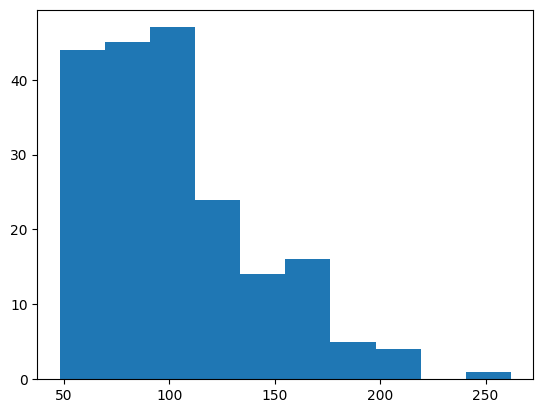

In [181]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

plt.pyplot.hist(df['horsepower'])

plt.xlabel('Horsepower')
plt.ylabel('count')
plt.title('Horsepower bins')
plt.show()

In [182]:
bins = np.linspace(min(df['horsepower']), max(df['horsepower']), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [183]:
group_names = ['low', 'medium','high']

Now we use __cut__ to determine what each value gropu_names belongs to

In [184]:
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels = group_names, include_lowest= True)
df[['horsepower', 'horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,low
1,154,medium
2,102,low
3,115,low
4,110,low
5,110,low
6,110,low
7,140,medium
8,101,low
9,101,low
